### <h2 align="center"> 📚 Polynomial Regression-Theory & Project</h2>

>### 2 Polynomial Regression-Theory

##### **Polynomial Regression** : Used when data has non-linear relationship.Creates curved best-fit line by adding polynomial terms.

##### 2.1 Why Polynomial Regression?

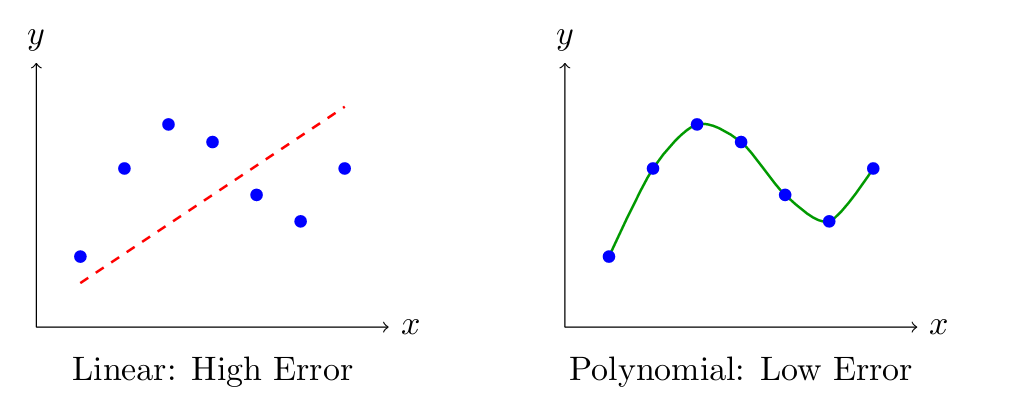

##### 2.2 Polynomial Equations by Degree

 <mark>Simple Polynomial Regression (One Feature)</mark>

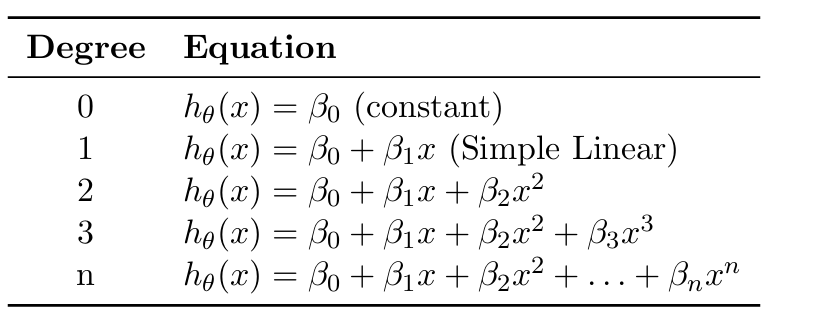

<mark>Multiple Polynomial Regression (Two Features)</mark>

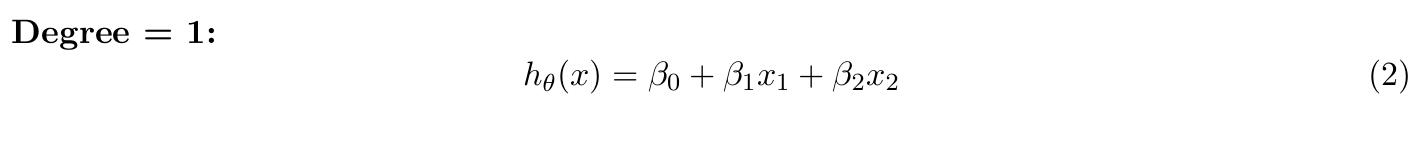

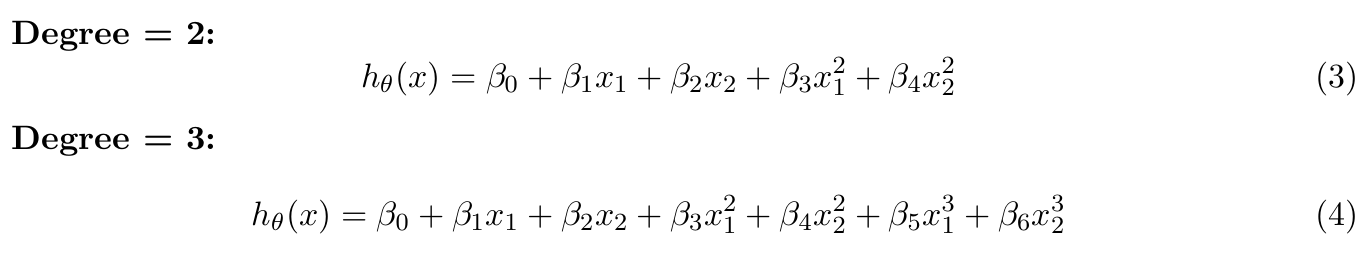

#### 2.3 Degree Selection & Overfitting

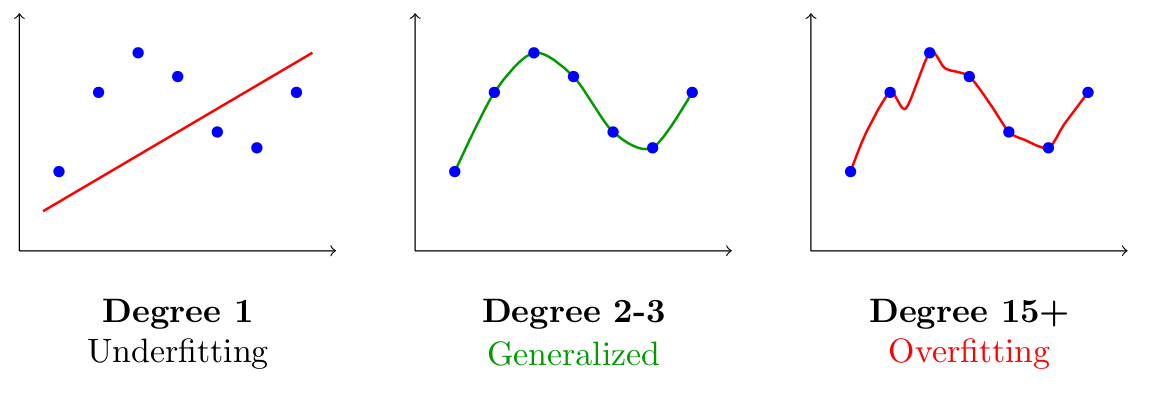

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"> 
<b>Warning:</b> 

High degree → Overfitting (fits every point including noise). Our task: Find optimal
degree that generalizes well.
</div>

>### 3 Polynomial Regression- Implementation

####  Step 1: Create Non-Linear Dataset

In [2]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

Text(0, 0.5, 'Y dataset')

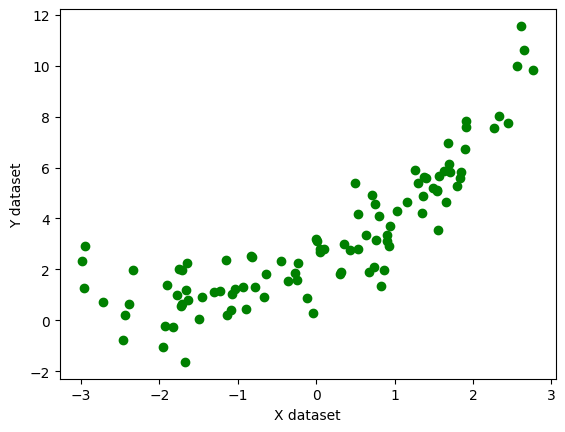

In [3]:
X = 6 * np.random.rand(100, 1) - 3 # Random values with outliers
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"><b>Note:</b>
Quadratic equation form: ax2 + bx +c = 0
This creates parabolic/curved data points.
</div>

####  Step 2: Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

####  Step 3: Linear Regression (For Comparison)

In [5]:
## Lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [6]:
regression_1.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(X_test))
print(score)

0.7743611785026755


Text(0, 0.5, 'Y')

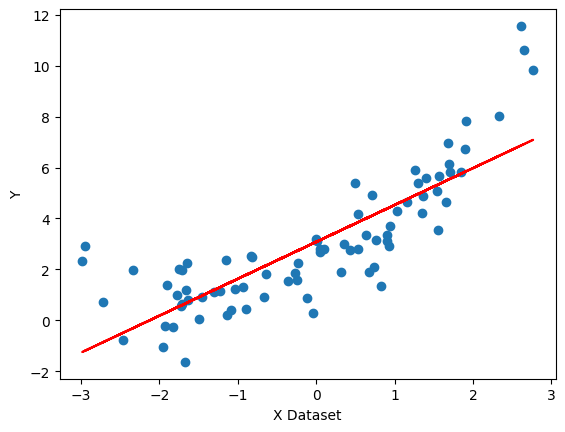

In [8]:
## Lets visualize this model
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")


#### Step 4: Polynomial Transformation

In [9]:
#LEts apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

```
Q. What PolynomialFeatures does: ?
  

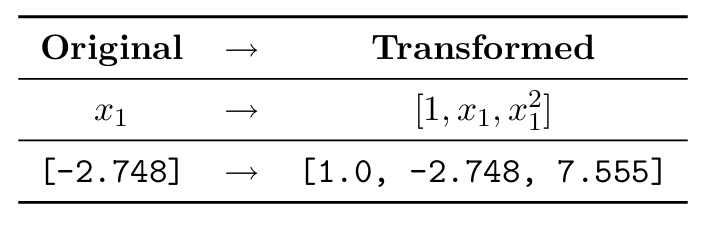

```
Defination :
include bias=True: Adds column of 1s (intercept term β0 · 1)

<details><summary><b>Important: fit transform vs transform:</b></summary>

   • fit transform: Learn + Apply on training data

   • transform: Only apply (using learned parameters) on test data

   • Never fit on test data- keeps it truly unseen!
</details>

In [11]:
X_train_poly # It creates 1, x, x^2 columns

array([[ 1.00000000e+00, -1.72743890e+00,  2.98404517e+00],
       [ 1.00000000e+00,  9.23469577e-01,  8.52796060e-01],
       [ 1.00000000e+00,  1.03200950e+00,  1.06504360e+00],
       [ 1.00000000e+00, -1.23428940e+00,  1.52347032e+00],
       [ 1.00000000e+00,  1.91074158e+00,  3.65093338e+00],
       [ 1.00000000e+00, -8.26860524e-01,  6.83698326e-01],
       [ 1.00000000e+00,  4.35722244e-01,  1.89853874e-01],
       [ 1.00000000e+00, -1.92449416e+00,  3.70367779e+00],
       [ 1.00000000e+00,  1.90320509e+00,  3.62218960e+00],
       [ 1.00000000e+00,  1.30343583e-02,  1.69894497e-04],
       [ 1.00000000e+00,  7.65426440e-01,  5.85877635e-01],
       [ 1.00000000e+00, -8.25963058e-01,  6.82214974e-01],
       [ 1.00000000e+00,  3.16054251e-01,  9.98902893e-02],
       [ 1.00000000e+00, -1.15402415e+00,  1.33177173e+00],
       [ 1.00000000e+00, -6.42715925e-01,  4.13083760e-01],
       [ 1.00000000e+00,  1.54438251e+00,  2.38511733e+00],
       [ 1.00000000e+00,  2.32898154e+00

In [12]:
X_test_poly # It creates 1, x, x^2 columns

array([[ 1.        , -2.95660423,  8.74150856],
       [ 1.        ,  0.74380233,  0.55324191],
       [ 1.        ,  1.36933882,  1.8750888 ],
       [ 1.        , -2.44233019,  5.96497675],
       [ 1.        ,  2.26088608,  5.11160585],
       [ 1.        , -1.06884283,  1.14242499],
       [ 1.        ,  1.62920526,  2.65430979],
       [ 1.        ,  1.49360162,  2.23084581],
       [ 1.        ,  2.45126071,  6.00867907],
       [ 1.        ,  0.2972351 ,  0.08834871],
       [ 1.        , -2.38960234,  5.71019932],
       [ 1.        ,  0.86822292,  0.75381104],
       [ 1.        ,  1.91172855,  3.65470605],
       [ 1.        ,  2.56233721,  6.565572  ],
       [ 1.        , -0.45581302,  0.20776551],
       [ 1.        , -0.78531119,  0.61671366],
       [ 1.        ,  1.79618768,  3.22629018],
       [ 1.        ,  1.5374208 ,  2.36366273],
       [ 1.        ,  1.83526082,  3.36818226],
       [ 1.        ,  0.80108838,  0.64174259]])

#### Step 5: Train Polynomial Model

In [13]:

from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9108242974313001


In [14]:
print(regression.coef_)

[[0.         1.56668351 0.50255396]]


In [15]:
print(regression.intercept_)

[2.02685807]


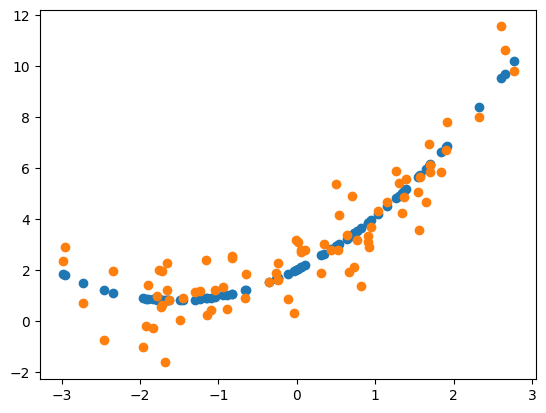

In [16]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

#### Step 6: Polynomial with degree 3

In [17]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [18]:
X_train_poly # transformed features (1, a1x, a2x^2, a3x^3)

array([[ 1.00000000e+00, -1.72743890e+00,  2.98404517e+00,
        -5.15475571e+00],
       [ 1.00000000e+00,  9.23469577e-01,  8.52796060e-01,
         7.87531217e-01],
       [ 1.00000000e+00,  1.03200950e+00,  1.06504360e+00,
         1.09913511e+00],
       [ 1.00000000e+00, -1.23428940e+00,  1.52347032e+00,
        -1.88040326e+00],
       [ 1.00000000e+00,  1.91074158e+00,  3.65093338e+00,
         6.97599022e+00],
       [ 1.00000000e+00, -8.26860524e-01,  6.83698326e-01,
        -5.65323156e-01],
       [ 1.00000000e+00,  4.35722244e-01,  1.89853874e-01,
         8.27235560e-02],
       [ 1.00000000e+00, -1.92449416e+00,  3.70367779e+00,
        -7.12770629e+00],
       [ 1.00000000e+00,  1.90320509e+00,  3.62218960e+00,
         6.89376967e+00],
       [ 1.00000000e+00,  1.30343583e-02,  1.69894497e-04,
         2.21446576e-06],
       [ 1.00000000e+00,  7.65426440e-01,  5.85877635e-01,
         4.48446232e-01],
       [ 1.00000000e+00, -8.25963058e-01,  6.82214974e-01,
      

In [19]:

from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9142869630489612


<details><summary><b>Tip : </b></summary> 
    Higher degree doesn’t always mean better! Degree 2 performed slightly better than degree
3 in this case.
</details>

####  Step 7: Prediction on New Data

In [20]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1) # linspace creates evenly spaced values over a specified range. Here from -3 to 3, 200 values. And reshape to make it a column vector
X_new_poly = poly.transform(X_new) #  Transform new data
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

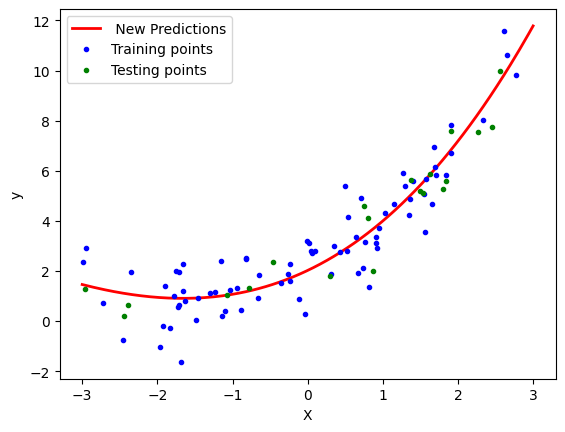

In [21]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

>### 3. Pipeline Concepts 

<details><summary><b> Why Pipeline? : </b></summary> 

    • Combines multiple steps into one object

    • Cleaner code, easier to manage

    • Automatic sequential execution
</details>

#### Implementation: Generic Polynomial Function

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

#### Pipeline Flow

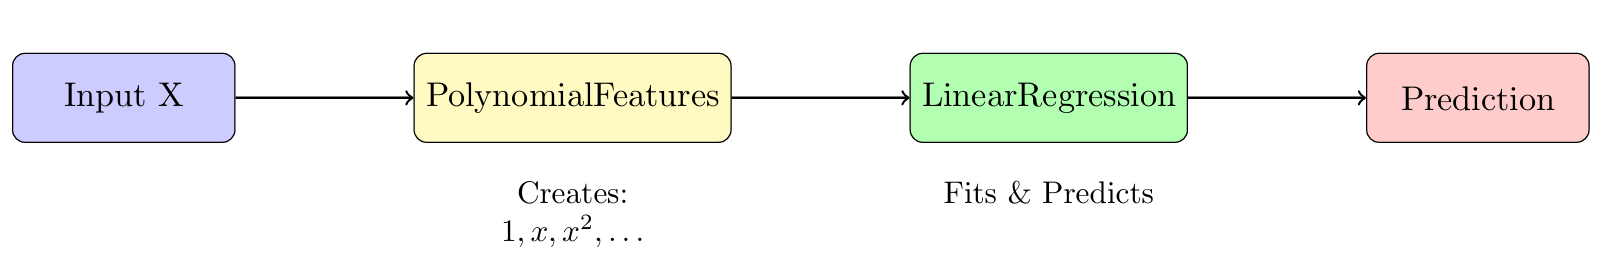

#### Testing Different Degrees

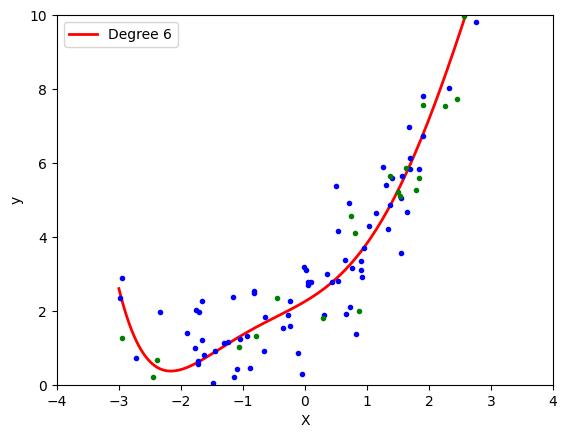

In [29]:
poly_regression(6)

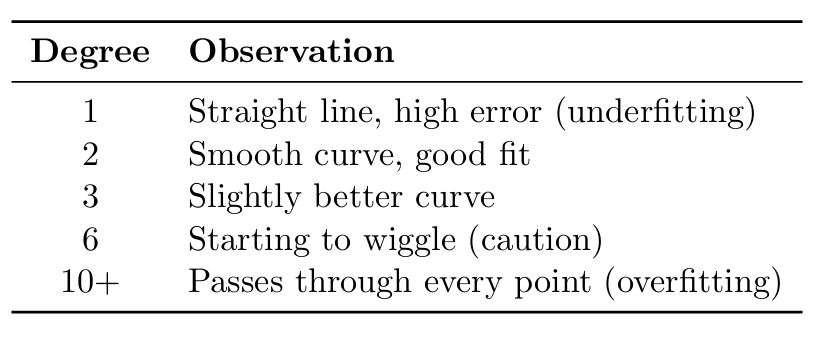

<details>
<summary><b>Warning :Overfitting Signs: </b></summary>

   • Curve passes through every training point

   • Wild oscillations between points
   
   • Poor performance on test data


</details>


<details><summary><b>Remember : Pipeline Key Points:</b></summary>

• Steps execute in order (first poly, then linear)

• .fit() applies to all steps

• .predict() also applies to all steps

• Easy to swap/add preprocessing steps